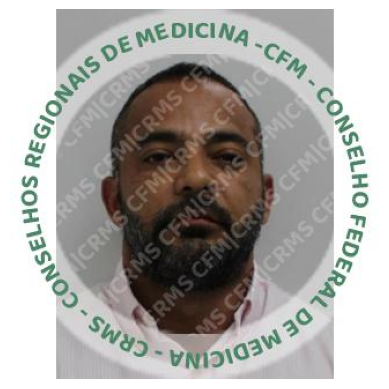

In [2]:
import numpy as np
import matplotlib.pyplot as plt
from PIL import Image
import os

# Set up the path to the image file
image_path = os.path.join('/kaggle/input/dataset-new-2/AC-2958-CassiusCleydeSouzaPereira.png')

# Open the image file
img = Image.open(image_path)

# Display the image
plt.imshow(img)
plt.axis('off')  # Turn off axis numbers and ticks
plt.show()

In [3]:
import tensorflow as tf
from tensorflow.keras import layers

# Load the CIFAR-10 dataset
(x_train, y_train), (x_test, y_test) = tf.keras.datasets.cifar10.load_data()

# Normalize image pixel values
x_train = x_train.astype('float32') / 255.0
x_test = x_test.astype('float32') / 255.0

2024-03-23 01:19:34.947195: E external/local_xla/xla/stream_executor/cuda/cuda_dnn.cc:9261] Unable to register cuDNN factory: Attempting to register factory for plugin cuDNN when one has already been registered
2024-03-23 01:19:34.947341: E external/local_xla/xla/stream_executor/cuda/cuda_fft.cc:607] Unable to register cuFFT factory: Attempting to register factory for plugin cuFFT when one has already been registered
2024-03-23 01:19:35.186276: E external/local_xla/xla/stream_executor/cuda/cuda_blas.cc:1515] Unable to register cuBLAS factory: Attempting to register factory for plugin cuBLAS when one has already been registered


170498071/170498071 ━━━━━━━━━━━━━━━━━━━━ 15s 0us/step


Convolutional Neural Network (CNN): Standard for image classification.

In [4]:
model = tf.keras.models.Sequential([
    layers.Conv2D(32, (3, 3), activation='relu', input_shape=(32, 32, 3)),
    layers.MaxPooling2D((2, 2)),
    layers.Conv2D(64, (3, 3), activation='relu'),
    layers.MaxPooling2D((2, 2)),
    layers.Flatten(),
    layers.Dense(64, activation='relu'),
    layers.Dense(10, activation='softmax')  # 10 output classes for CIFAR-10
])

/opt/conda/lib/python3.10/site-packages/keras/src/layers/convolutional/base_conv.py:99: UserWarning: Do not pass an `input_shape`/`input_dim` argument to a layer. When using Sequential models, prefer using an `Input(shape)` object as the first layer in the model instead.
  super().__init__(


Model Compilation

In [6]:
model.compile(optimizer='adam',
              loss='sparse_categorical_crossentropy',
              metrics=['accuracy'])

Model Training

In [7]:
model.fit(x_train, y_train, epochs=10, validation_data=(x_test, y_test))

Epoch 1/10
1563/1563 ━━━━━━━━━━━━━━━━━━━━ 40s 25ms/step - accuracy: 0.3770 - loss: 1.7092 - val_accuracy: 0.5722 - val_loss: 1.2062
Epoch 2/10
1563/1563 ━━━━━━━━━━━━━━━━━━━━ 40s 24ms/step - accuracy: 0.6027 - loss: 1.1362 - val_accuracy: 0.6343 - val_loss: 1.0530
Epoch 3/10
1563/1563 ━━━━━━━━━━━━━━━━━━━━ 37s 24ms/step - accuracy: 0.6520 - loss: 0.9895 - val_accuracy: 0.6485 - val_loss: 1.0021
Epoch 4/10
1563/1563 ━━━━━━━━━━━━━━━━━━━━ 38s 24ms/step - accuracy: 0.6896 - loss: 0.8912 - val_accuracy: 0.6794 - val_loss: 0.9210
Epoch 5/10
1563/1563 ━━━━━━━━━━━━━━━━━━━━ 37s 24ms/step - accuracy: 0.7141 - loss: 0.8254 - val_accuracy: 0.6868 - val_loss: 0.9109
Epoch 6/10
1563/1563 ━━━━━━━━━━━━━━━━━━━━ 36s 23ms/step - accuracy: 0.7375 - loss: 0.7561 - val_accuracy: 0.6941 - val_loss: 0.8982
Epoch 7/10
1563/1563 ━━━━━━━━━━━━━━━━━━━━ 37s 24ms/step - accuracy: 0.7547 - loss: 0.7098 - val_accuracy: 0.6969 - val_loss: 0.8989
Epoch 8/10
1563/1563 ━━━━━━━━━━━━━━━━━━━━ 40s 23ms/step - accuracy: 0.7719 -

Evaluation

In [8]:
test_loss, test_acc = model.evaluate(x_test,  y_test, verbose=2)
print('Test accuracy:', test_acc)

313/313 - 2s - 7ms/step - accuracy: 0.6994 - loss: 0.9392
Test accuracy: 0.699400007724762


Prediction

In [9]:
from PIL import Image
import numpy as np
import tensorflow as tf

# Load your image
image_path = '/kaggle/input/dataset-new-2/AC-2958-CassiusCleydeSouzaPereira.png'  # Replace with your actual image path
img = Image.open(image_path).resize((32, 32))  # Resize to match model input
img_array = np.array(img) / 255.0  # Normalize
img_array = np.expand_dims(img_array, axis=0)  # Add batch dimension

# Predict
prediction = model.predict(img_array) 

1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 85ms/step
